In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [2]:
X_train = pd.read_csv(
    '/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_train_all.csv')

X_test = pd.read_csv(
    '/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/x_test_all.csv')

y_train = pd.read_csv(
    "/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_train_all.csv")

y_test = pd.read_csv(
    "/Users/ilya/Desktop/Course_work_Data_mining/CompleteDataSet/y_test_all.csv")

In [3]:
y_train['0'].value_counts()

0
2    2250
1    2220
4    1980
3    1410
8     540
6     360
9     270
7     240
0     210
5     210
Name: count, dtype: int64

In [8]:
# Normalize the data to range [0, 1]
X_train_norm = X_train / 255
X_test_norm = X_test / 255

In [5]:
X_train_norm.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0.305882,0.301961,0.298039,0.321569,0.341176,0.360784,0.407843,0.466667,0.458824,0.470588,...,0.341176,0.309804,0.282353,0.298039,0.325490,0.372549,0.388235,0.384314,0.372549,0.368627
1,0.286275,0.294118,0.309804,0.305882,0.298039,0.294118,0.349020,0.419608,0.521569,0.490196,...,0.376471,0.364706,0.333333,0.301961,0.270588,0.286275,0.325490,0.392157,0.396078,0.396078
2,0.282353,0.294118,0.309804,0.301961,0.317647,0.349020,0.411765,0.427451,0.337255,0.352941,...,0.384314,0.372549,0.345098,0.313725,0.286275,0.278431,0.290196,0.313725,0.349020,0.372549
3,0.262745,0.274510,0.290196,0.313725,0.364706,0.419608,0.431373,0.376471,0.270588,0.392157,...,0.439216,0.360784,0.341176,0.321569,0.301961,0.282353,0.274510,0.282353,0.317647,0.345098
4,0.290196,0.290196,0.286275,0.282353,0.301961,0.341176,0.407843,0.427451,0.329412,0.325490,...,0.392157,0.384314,0.388235,0.392157,0.388235,0.349020,0.305882,0.258824,0.266667,0.282353


In [9]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_norm, y_train.values.ravel())

y_pred_rf = rf_model.predict(X_test_norm)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)

0.772
              precision    recall  f1-score   support

           0       0.85      0.18      0.30        60
           1       0.73      0.87      0.80       720
           2       0.82      0.83      0.83       750
           3       0.75      0.80      0.77       450
           4       0.82      0.79      0.81       660
           5       0.88      0.50      0.64        60
           6       0.71      0.53      0.61        90
           7       0.89      0.28      0.43        60
           8       0.64      0.69      0.66       150
           9       0.73      0.49      0.59        90

    accuracy                           0.77      3090
   macro avg       0.78      0.60      0.64      3090
weighted avg       0.78      0.77      0.76      3090



In [11]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(random_seed=42)

cb_model.fit(X_train_norm, y_train)

y_pred_cb = cb_model.predict(X_test_norm)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_cb)
class_report = classification_report(y_test, y_pred_cb)

print(accuracy.round(3))
print(class_report)

Learning rate set to 0.088844
0:	learn: 2.1266410	total: 578ms	remaining: 9m 37s
1:	learn: 1.9814639	total: 1.11s	remaining: 9m 16s
2:	learn: 1.8897637	total: 1.58s	remaining: 8m 45s
3:	learn: 1.7933216	total: 2.06s	remaining: 8m 32s
4:	learn: 1.7293327	total: 2.54s	remaining: 8m 25s
5:	learn: 1.6687654	total: 3.02s	remaining: 8m 19s
6:	learn: 1.6133945	total: 3.53s	remaining: 8m 21s
7:	learn: 1.5539859	total: 4.01s	remaining: 8m 17s
8:	learn: 1.5123005	total: 4.49s	remaining: 8m 13s
9:	learn: 1.4621117	total: 4.95s	remaining: 8m 10s
10:	learn: 1.4188325	total: 5.42s	remaining: 8m 7s
11:	learn: 1.3843246	total: 5.88s	remaining: 8m 4s
12:	learn: 1.3535123	total: 6.36s	remaining: 8m 2s
13:	learn: 1.3183720	total: 6.83s	remaining: 8m
14:	learn: 1.2857124	total: 7.29s	remaining: 7m 58s
15:	learn: 1.2619086	total: 7.75s	remaining: 7m 56s
16:	learn: 1.2351226	total: 8.22s	remaining: 7m 55s
17:	learn: 1.2148109	total: 8.7s	remaining: 7m 54s
18:	learn: 1.1939833	total: 9.17s	remaining: 7m 53s


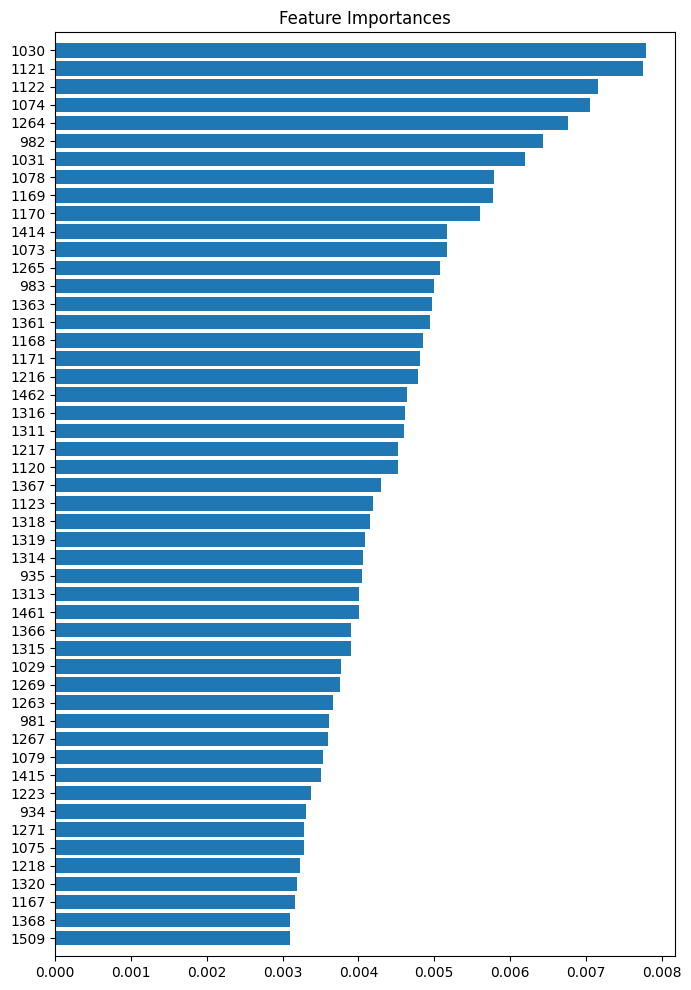

In [6]:
import matplotlib.pyplot as plt

# Extract feature importances
importances_rf = rf_model.feature_importances_

# Sort feature importances in descending order and get the indices
indices_rf = np.argsort(importances_rf)[::-1]

# Plot the top 'n' feature importances
n = 50  # for example, top 50 features
plt.figure(figsize=(8, 12))  # Adjusted the figure size for vertical orientation
plt.title("Feature Importances")
plt.barh(range(n), importances_rf[indices_rf[:n]], align="center")
plt.yticks(range(n), indices_rf[:n])
plt.ylim([-1, n])
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

## Now we will use SMOTE technique to oversample the minority class

In [12]:
# Apply SMOTE for class imbalance
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_norm, y_train['0'])  # Ensure '0' is the correct label column

print(y_train_resampled.value_counts())

0
0    2250
1    2250
2    2250
3    2250
4    2250
5    2250
6    2250
7    2250
8    2250
9    2250
Name: count, dtype: int64


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled.ravel())

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


/Users/ilya/miniconda3/envs/tensorflow/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train_resampled, y_train_resampled.ravel())

y_pred_rf = rf_model.predict(X_test_norm)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_rf)
class_report = classification_report(y_test, y_pred_rf)

print(accuracy.round(3))
print(class_report)

0.772
              precision    recall  f1-score   support

           0       0.67      0.17      0.27        60
           1       0.76      0.83      0.80       720
           2       0.81      0.81      0.81       750
           3       0.76      0.81      0.79       450
           4       0.78      0.81      0.80       660
           5       0.87      0.55      0.67        60
           6       0.74      0.66      0.69        90
           7       0.83      0.25      0.38        60
           8       0.68      0.75      0.72       150
           9       0.69      0.52      0.59        90

    accuracy                           0.77      3090
   macro avg       0.76      0.62      0.65      3090
weighted avg       0.77      0.77      0.76      3090



In [13]:
from catboost import CatBoostClassifier

cb_model = CatBoostClassifier(random_seed=42)

cb_model.fit(X_train_resampled, y_train_resampled)

y_pred_cb = cb_model.predict(X_test_norm)

# Calculating the metrics
accuracy = accuracy_score(y_test, y_pred_cb)
class_report = classification_report(y_test, y_pred_cb)

print(accuracy.round(3))
print(class_report)

Learning rate set to 0.092744
0:	learn: 2.0845246	total: 703ms	remaining: 11m 42s
1:	learn: 1.9233736	total: 1.38s	remaining: 11m 30s
2:	learn: 1.8071139	total: 2.04s	remaining: 11m 18s
3:	learn: 1.7059848	total: 2.7s	remaining: 11m 12s
4:	learn: 1.6178162	total: 3.37s	remaining: 11m 10s
5:	learn: 1.5484650	total: 4.03s	remaining: 11m 6s
6:	learn: 1.4893826	total: 4.74s	remaining: 11m 12s
7:	learn: 1.4280066	total: 5.43s	remaining: 11m 12s
8:	learn: 1.3686749	total: 6.11s	remaining: 11m 13s


KeyboardInterrupt: 